# Data description


In [1]:
# Packages are imported
import pandas as pd
import numpy as np 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from scipy.stats import pearsonr

In [2]:
# A DataFrame is created from the salary data
salary_df = pd.read_csv('salary.csv')
salary_df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [3]:
salary_df.isnull().values.any()

True

In [4]:
# Checking null values
salary_df[salary_df['salary'].isnull()]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


In [5]:
salary_df['yearsrank'].median()

5.0

In [6]:
#Dropping row with null value
salary_df_new = salary_df.dropna(axis=0, inplace=True)

In [7]:
salary_df.isnull().values.any()

False

# Exploratory Data Analysis

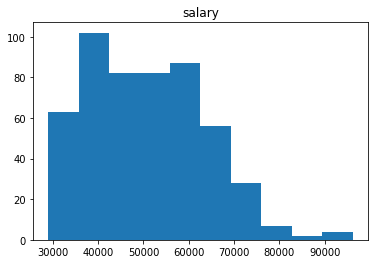

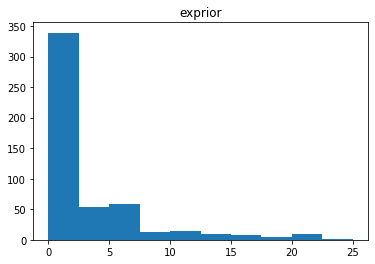

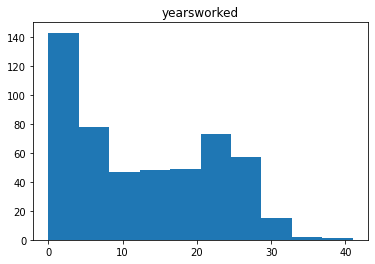

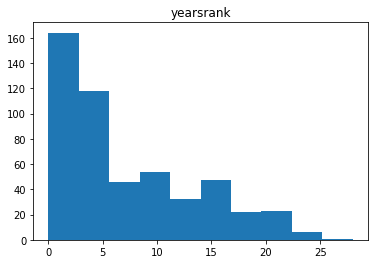

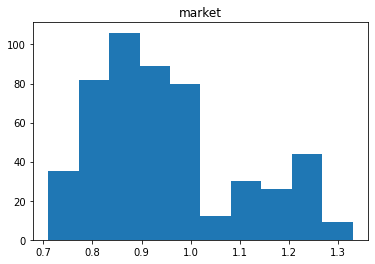

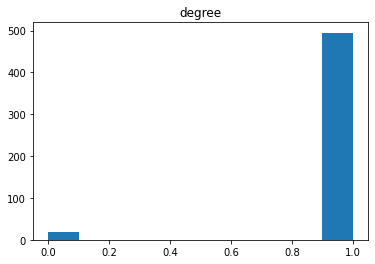

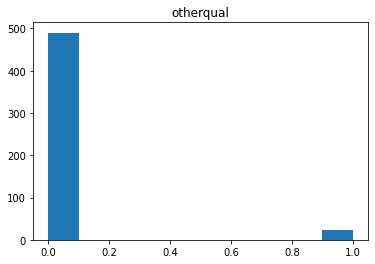

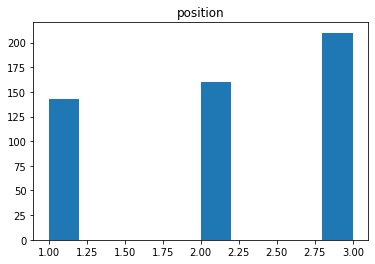

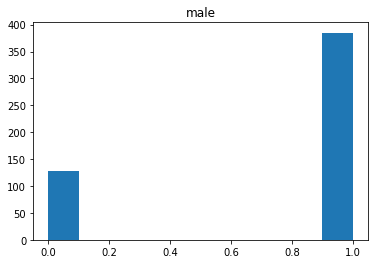

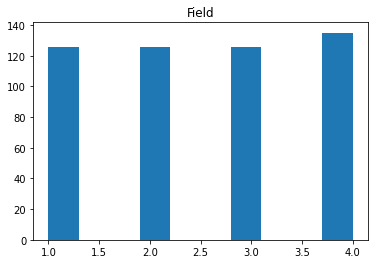

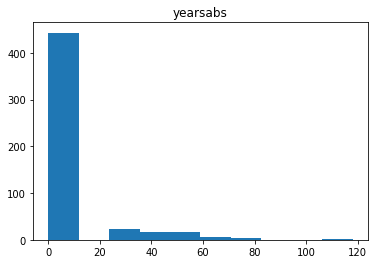

In [8]:
for i in list(salary_df.columns):
    plt.hist(salary_df[i])
    plt.title(i)
    plt.show()

In [9]:
# A correlation matrix is drawn
salary_df.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


# Visualizations are Checked for distributions,patterns and outliers


Text(0, 0.5, 'salary')

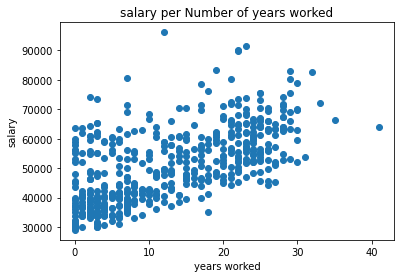

In [10]:
#plot graph to understand relationship between years worked and salary
plt.scatter(salary_df['yearsworked'],salary_df['salary'])
plt.title('salary per Number of years worked')
plt.xlabel('years worked')
plt.ylabel('salary')

In [11]:
pearsonr(salary_df['yearsworked'],salary_df['salary'])

(0.6235888657598051, 1.287335134291421e-56)

# Spliting model into training and testing set

In [12]:
x1 = salary_df[['yearsworked']]

In [13]:
x = sm.add_constant(x1.values)

In [14]:
y = salary_df['salary']

In [16]:
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [17]:
#check null values in training set
y_train.isnull().values.any()

False

# Predictions and Evaluation / Modelling with constant


In [18]:
model = sm.OLS(y_train, x_train).fit()

In [20]:
predictions = model.predict(x_test)

Text(0, 0.5, 'Y-Predicted')

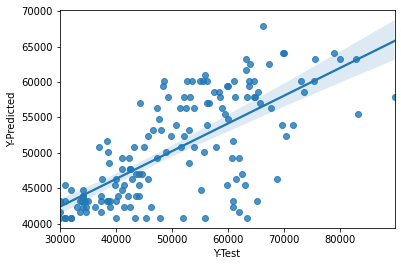

In [21]:
sns.regplot(y_test, predictions)
plt.xlabel('Y-Test')
plt.ylabel('Y-Predicted')

In [23]:
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     187.5
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           1.35e-34
Time:                        17:13:45   Log-Likelihood:                -3817.5
No. Observations:                 359   AIC:                             7639.
Df Residuals:                     357   BIC:                             7647.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.082e+04    905.027     45.104      0.000     3.9e+04    4.26e+04
x1           774.7688     56.582     13.693      0.000     663.493     886.044
==============================================================================
Omnibus:                       63.183   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.136
Skew:                           1.076   Prob(JB):                     4.90e-22
Kurtosis:                       4.390   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model.predict(pd.DataFrame({'conts':1.0, 'years':[12,80]}))

0     50117.213957
1    102801.492334
dtype: float64

In [25]:
print('TEST RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('TRAIN RMSE:', np.sqrt(metrics.mean_squared_error(y_train, model.predict(x_train))))

TESE RMSE: 9639.131250830247
TRAIN RMSE: 10045.176101008155


# Modelling without constant

In [26]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=101)

In [27]:
model = sm.OLS(y_train, x1_train).fit()

In [30]:
predictions = model.predict(x1_test)

Text(0, 0.5, 'Y-Predicted')

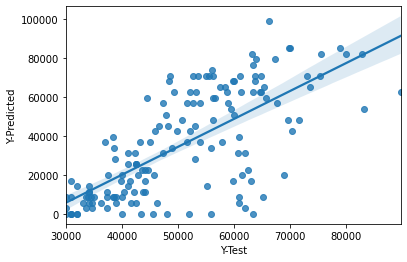

In [31]:
sns.regplot(y_test, predictions)
plt.xlabel('Y-Test')
plt.ylabel('Y-Predicted')

In [5]:
model.summary()

NameError: name 'model' is not defined

In [4]:
model.predict([12, 80])Modelling

NameError: name 'model' is not defined

In [34]:
print('TEST RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('TRAIN RMSE:', np.sqrt(metrics.mean_squared_error(y_train, model.predict(x1_train))))

TEST RMSE: 25156.779555611032
TRAIN RMSE: 25998.23792521561


# Therefore, the model with the constant is better at predicting values as it has a RSME that is significantly smaller than when the one without a constant.